# Data Challenge 1: Breast Cancer

**Challenge: Use the breast cancer dataset to predict whether a tumor is benign or malignant**

## Part 1: Obtain and clean the data

We will start by loading the dataset, which is included as a .csv file in this directory:

In [256]:
# Load needed packages
import pandas as pd
import numpy as np

In [257]:
# There's an index column (patient ID) in column 0 and NO header
breast_cancer = pd.read_csv("./breast-cancer-data.csv.data", index_col=0, header = None)

Now let's look at the dataset to see if there's anything we should improve

In [258]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1000025 to 897471
Data columns (total 10 columns):
1     699 non-null int64
2     699 non-null int64
3     699 non-null int64
4     699 non-null int64
5     699 non-null int64
6     699 non-null object
7     699 non-null int64
8     699 non-null int64
9     699 non-null int64
10    699 non-null int64
dtypes: int64(9), object(1)
memory usage: 60.1+ KB


2 things to note here:

1. We can improve this by changing the columns to actual descriptive names, which are provided in the data set description
2. Column 6 is an "object" rather than an integer

The columns are easy to change:

In [259]:
breast_cancer.columns = ['Thickness', 'Size_Uniformity', 'Shape_Uniformity',
                         'Marginal_Adhesion', 'Epithelial_Size', 'Bare_Nuclei',
                         'Bland_Chromatin', 'Normal_Nucleoli','Mitoses', 'Class'
                        ]
print(breast_cancer.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1000025 to 897471
Data columns (total 10 columns):
Thickness            699 non-null int64
Size_Uniformity      699 non-null int64
Shape_Uniformity     699 non-null int64
Marginal_Adhesion    699 non-null int64
Epithelial_Size      699 non-null int64
Bare_Nuclei          699 non-null object
Bland_Chromatin      699 non-null int64
Normal_Nucleoli      699 non-null int64
Mitoses              699 non-null int64
Class                699 non-null int64
dtypes: int64(9), object(1)
memory usage: 60.1+ KB
None


Another thing to note is that we captured all 699 cases, so that's a good sign. Let's now take a look at the Bare_Nuclei and see why it's a string

In [260]:
breast_cancer.Bare_Nuclei.value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare_Nuclei, dtype: int64

There's 16 values set as question marks; these should be set as missing instead and we should make it a numeric

In [261]:
breast_cancer.Bare_Nuclei = pd.to_numeric(breast_cancer.Bare_Nuclei,errors = np.nan)
breast_cancer.Bare_Nuclei.value_counts(dropna=False)

 1.0     402
 10.0    132
 5.0      30
 2.0      30
 3.0      28
 8.0      21
 4.0      19
NaN       16
 9.0       9
 7.0       8
 6.0       4
Name: Bare_Nuclei, dtype: int64

One more annoyance remains: the "Class" doesn't really give a good idea of whether a tumor is "Benign" or "Malignant"; let's fix this by replacing the nonsensical numbers with the class labels

In [262]:
breast_cancer.Class = breast_cancer.Class.replace({2:'Benign', 4:'Malignant'})

In [263]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1000025 to 897471
Data columns (total 10 columns):
Thickness            699 non-null int64
Size_Uniformity      699 non-null int64
Shape_Uniformity     699 non-null int64
Marginal_Adhesion    699 non-null int64
Epithelial_Size      699 non-null int64
Bare_Nuclei          683 non-null float64
Bland_Chromatin      699 non-null int64
Normal_Nucleoli      699 non-null int64
Mitoses              699 non-null int64
Class                699 non-null object
dtypes: float64(1), int64(8), object(1)
memory usage: 60.1+ KB


For good measure, what's the class balance between the two?

In [264]:
breast_cancer.Class.value_counts()

Benign       458
Malignant    241
Name: Class, dtype: int64

Looks like the 2 classes are pretty imbalanced; we may need to address this later. We can move on to exploratory data analysis (EDA)

## Part 2: Exploratory Data Analysis

We need to see what our data look like; one way is by looking directly at the descriptive stats for each numerical column 

In [265]:
breast_cancer.describe()

,Thickness,Size_Uniformity,Shape_Uniformity,Marginal_Adhesion,Epithelial_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
count,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


A plus of the data is that they're all scaled fro 1 to 10; we can plot them on the same axes if we'd like to do that.

Let's start plotting with a simple histogram for each feature; this will show up the distribution of values in each category

In [266]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10,40)
mpl.rcParams.update({'font.size': 18})

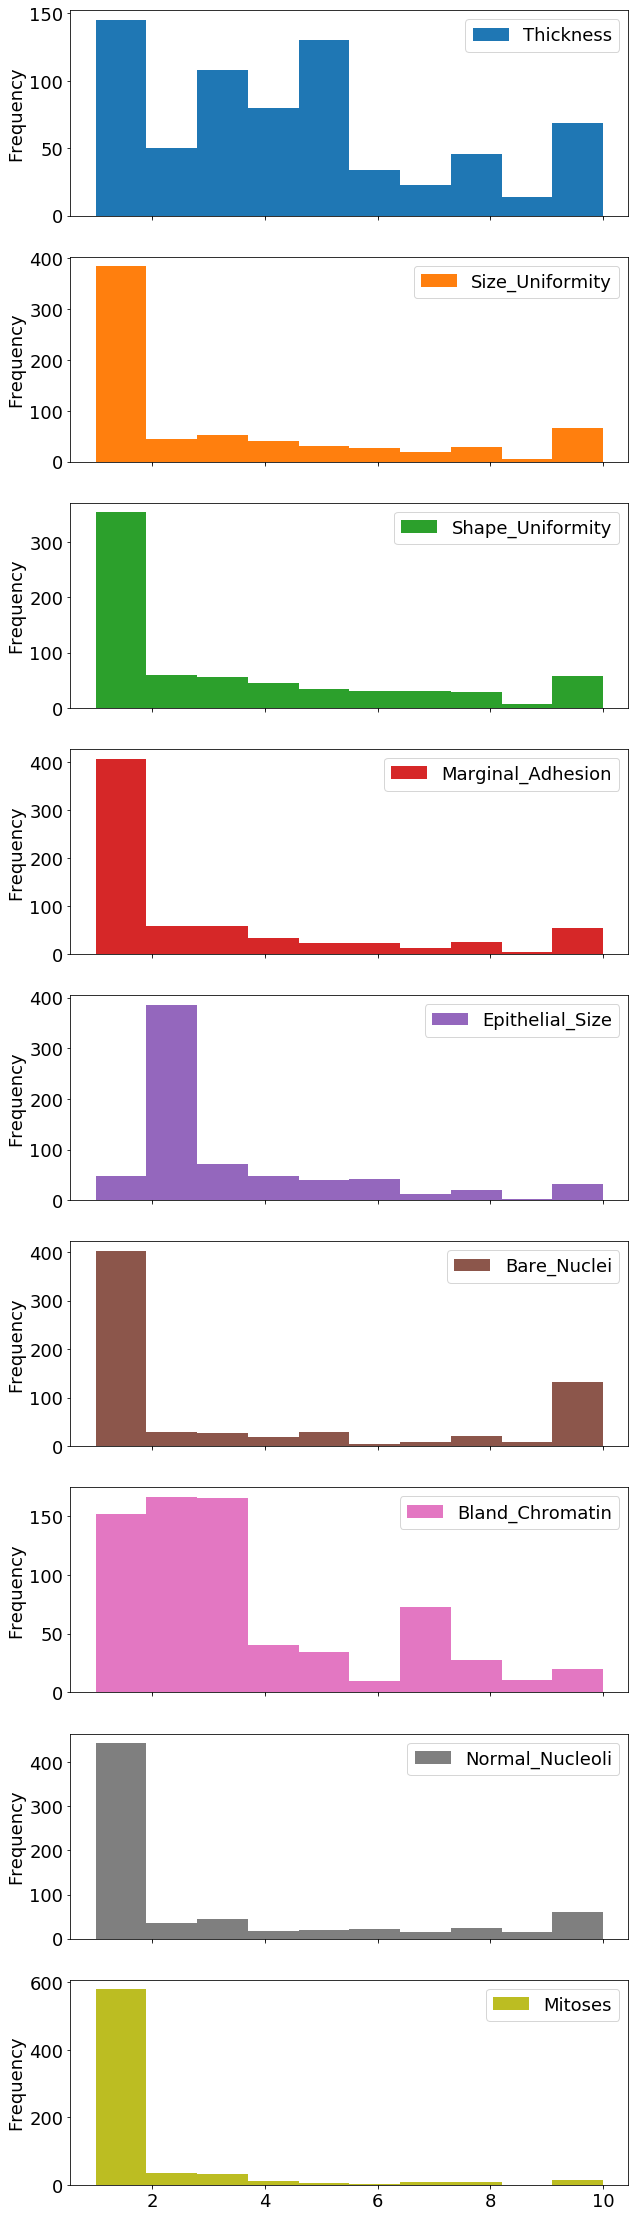

In [267]:
# Create a color mapping
cancer_colors = {'Benign':'blue', 'Malignant':'red'}

# Make a beeswarm plot and display it
breast_cancer.plot(kind = 'hist', subplots=True)
plt.show()

We're really more interested in how these categories compare for Benign vs. Malignant; we'd like to make plots to show this instead. For this purpose, we'll impute the NA rows using the median; there's only 16 of them so we'll likely be alright

In [281]:
fill_val = breast_cancer['Bare_Nuclei'].median()
breast_cancer['Bare_Nuclei'] = breast_cancer['Bare_Nuclei'].fillna(fill_val)
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1000025 to 897471
Data columns (total 10 columns):
Thickness            699 non-null int64
Size_Uniformity      699 non-null int64
Shape_Uniformity     699 non-null int64
Marginal_Adhesion    699 non-null int64
Epithelial_Size      699 non-null int64
Bare_Nuclei          699 non-null float64
Bland_Chromatin      699 non-null int64
Normal_Nucleoli      699 non-null int64
Mitoses              699 non-null int64
Class                699 non-null object
dtypes: float64(1), int64(8), object(1)
memory usage: 80.1+ KB


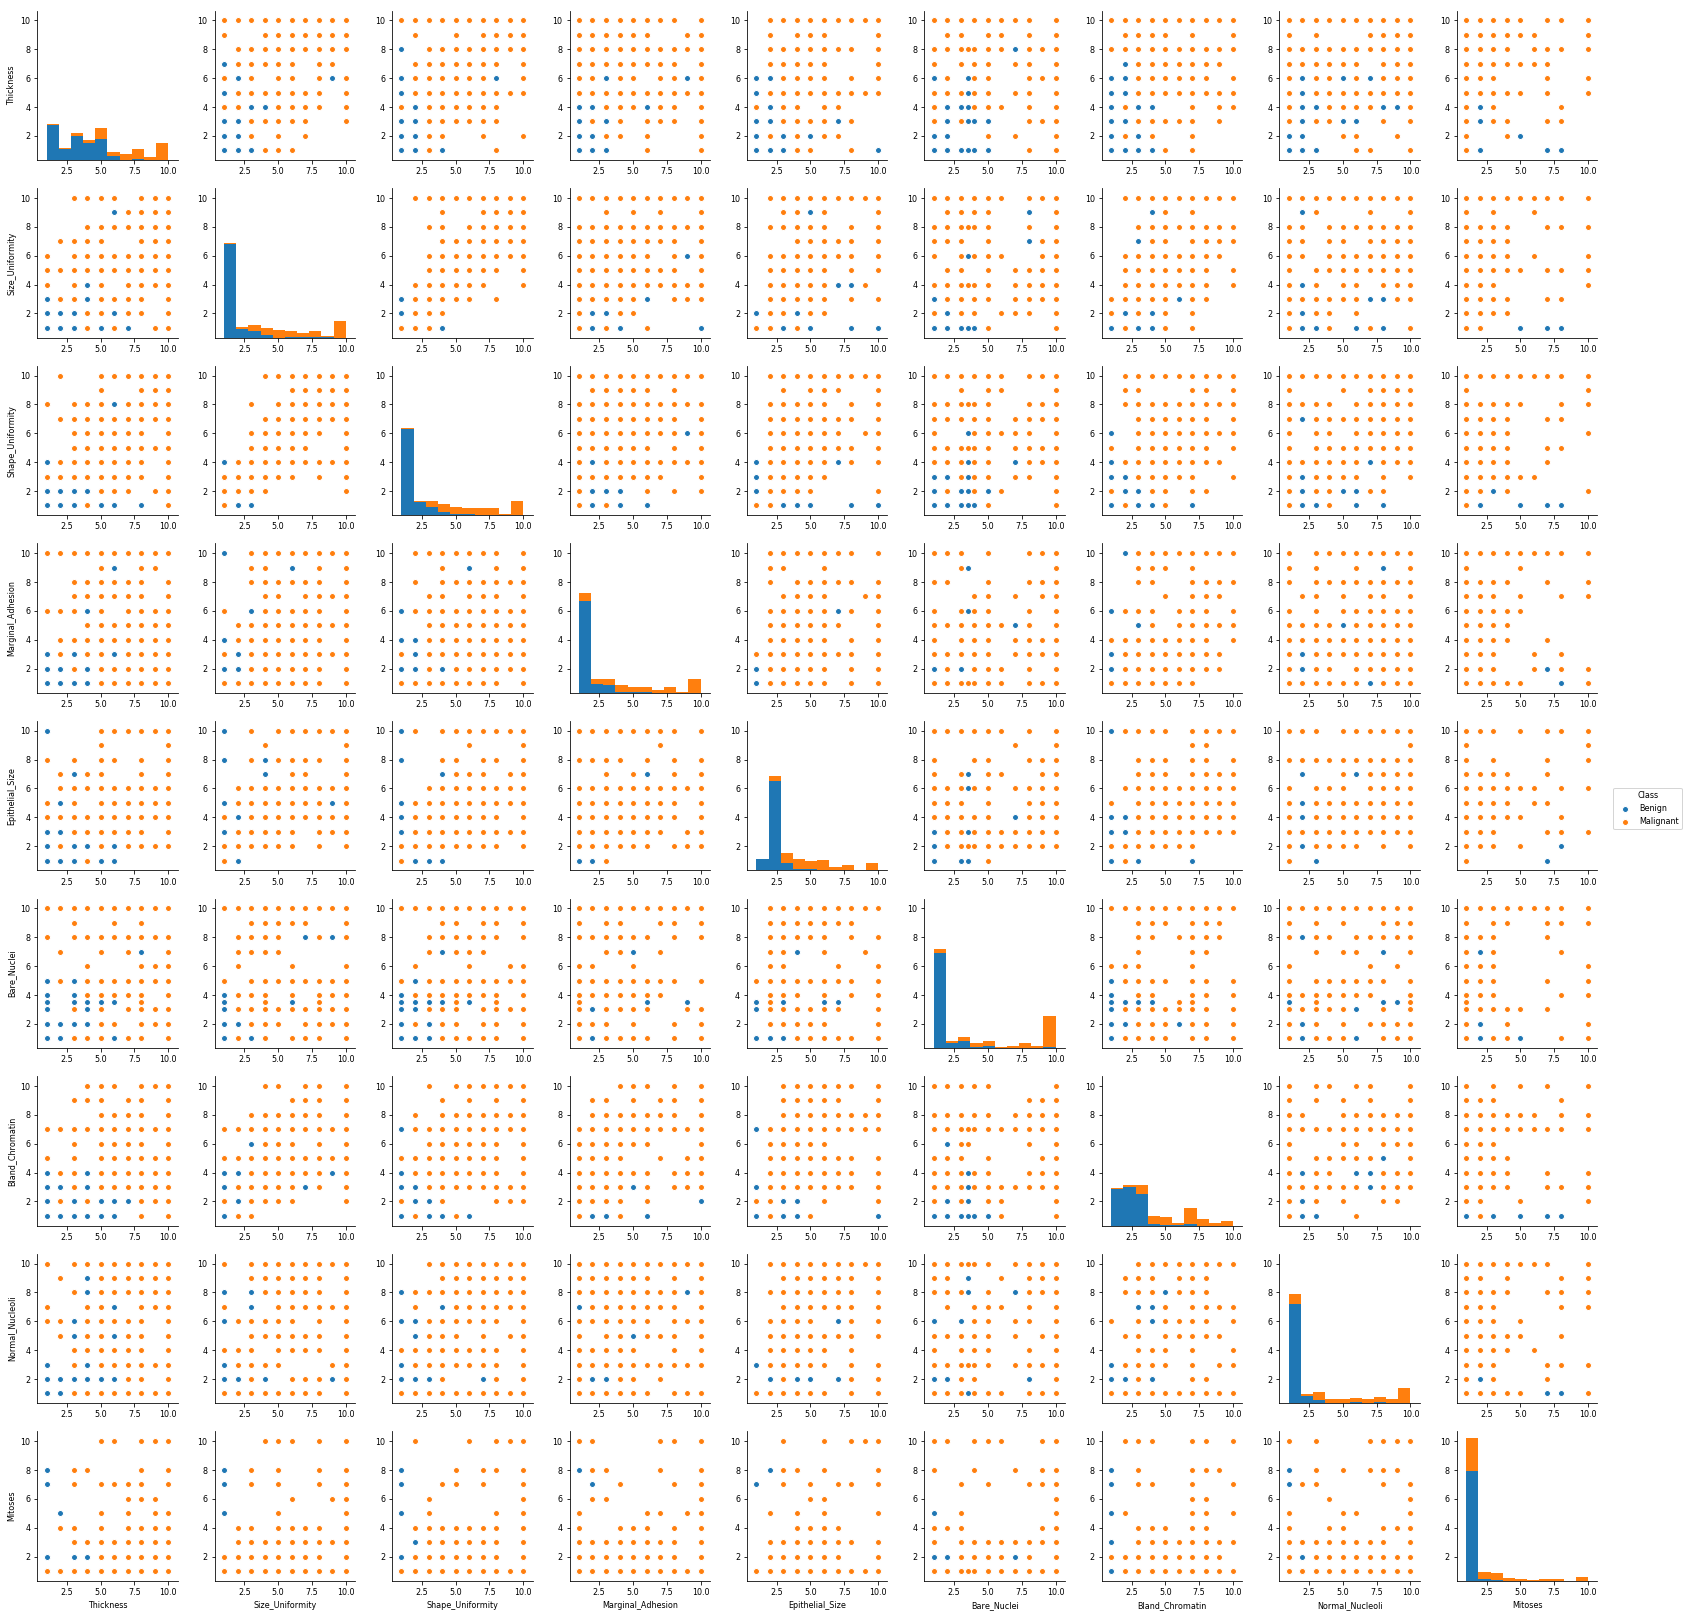

In [282]:
mpl.rcParams.update({'font.size': 8})
sns.pairplot(data= breast_cancer, hue = 'Class')
plt.show()

Clearly, this is a bunch of plots and they're all pretty small, but there's a couple takeaways here:

1. Malignant tumors tend to dominate the high values for each feature, whereas benign are more prevalent at low values
2. Many features show a similar distribution pattern; there's a good chance the features are correlated

Based on these takeways, we'd also like to create a correlation matrix for the data

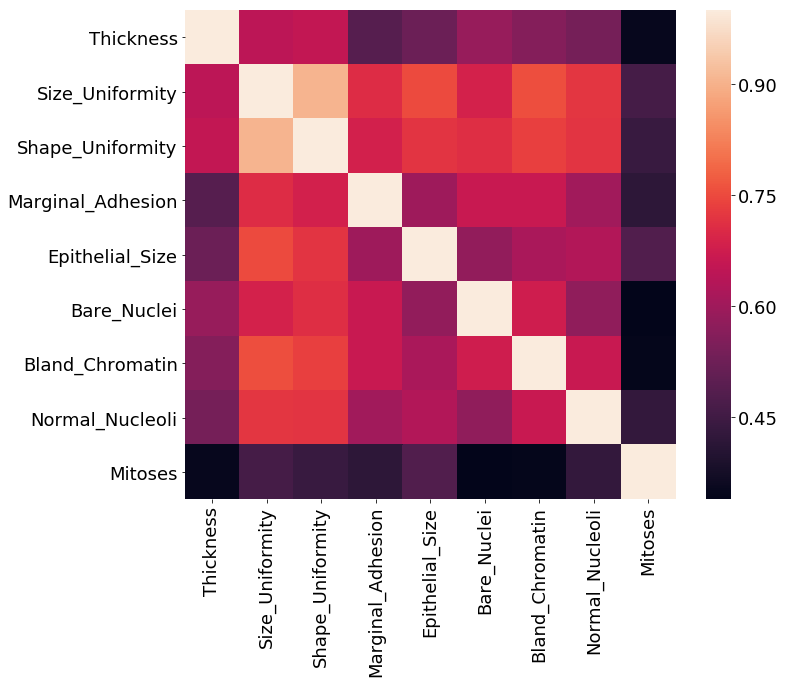

In [283]:
corr = breast_cancer.corr()

# Set up the matplotlib figure
mpl.rcParams.update({'font.size': 18})
f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(corr)

It looks like size uniformity and shape are VERY highly correlated (R > 0.9). The rest of the features aren't exactly separated from one another either and with the exception of "Mitoses", seem to be correlated to one another at R = 0.5 and above

## Part 3: Prediction

At this point, we've explored some features of the dataset and come up with some useful conclusions. Namely:

1. The dataset is imbalanced, favoring Benign classes
2. There's lots of correlation in the features; in particular, 2 features are nearly identical
3. Benign seem to have lower values than Malignant in basically all features

We're going to proceed to the prediction portion now. It's clear that if we wanted to, we could simply claim every class as "Benign" and be right about 2/3 of the time. So we'll have to take that into account. 

Let's begin by importing the packages and then move from there. 

In [284]:
# Import logistic regression, some tree methods, scoring, and splitting from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score
from sklearn.metrics import roc_curve

We'll begin by splitting test/train sets from our data for this purpose. In doing so, we'll designate "0" as Benign and "1" as malignant

In [285]:
X = breast_cancer[breast_cancer.columns[:-1]].values
Y = breast_cancer['Class'].replace({'Benign':0, 'Malignant':1}).values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)#, stratify = y)

### The Null Model

This is our null hypothesis: every person has a Benign tumor. If we create this model, we can measure its accuracy AND its AUC:

In [286]:
Y_pred = np.repeat(0, len(Y_test))
print(classification_report(Y_test, Y_pred))

             precision    recall  f1-score   support

          0       0.66      1.00      0.79        92
          1       0.00      0.00      0.00        48

avg / total       0.43      0.66      0.52       140



/home/matt/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Null accuracy is: 0.6571428571428571
Null AUC is : 0.5


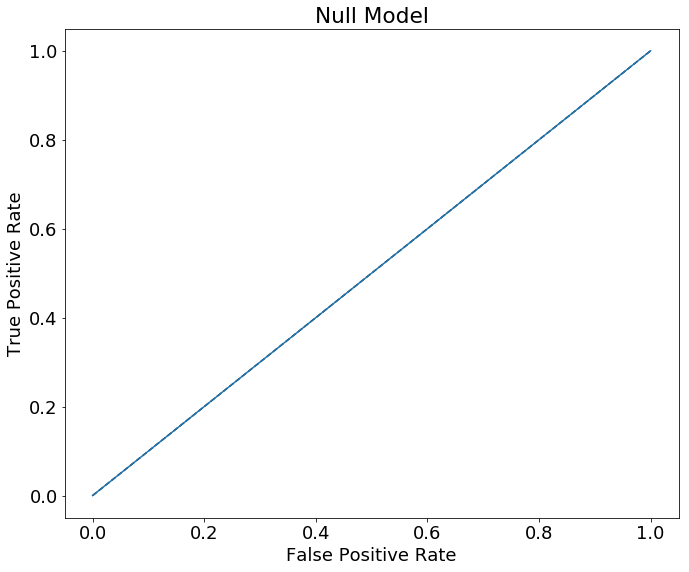

In [287]:
# Print out Accuracy and AUC scores
null_acc = np.sum(Y_test == 0)/len(Y_test)
print("Null accuracy is: {}".format(null_acc))
print("Null AUC is : {}".format(roc_auc_score(Y_test,Y_pred)))

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)

# Plot ROC curve
mpl.rcParams.update({'font.size': 18})
f, ax = plt.subplots(figsize=(11, 9))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Null Model')
plt.show()

Clearly, although the null model is predicting almost 2/3 of cases correctly, it's not adding much value because it predict every 'Malignant' class incorrectly. we have lots of room to improve. 

For simplicity's sake, we'll now move on to a simple model: logistic regression. We'll feed in the same data, then take the same scores. Now that we have actual models, let's make a scoring function:

In [288]:
def scoreBreastModel(model, X_test, Y_test, label):
    
    # Predict probabilities with the model
    Y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:,1]

    # Generate ROC curve values: fpr, tpr, thresholds
    fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
    auc_score = roc_auc_score(Y_test, y_pred_prob)
    
    # Print the classificaiton matrix
    print(classification_report(Y_test, Y_pred))
    
    # Print the relevant scores
    print("{} accuracy is: {}".format(label, model.score(X_test, Y_test)))
    print("{} AUC is: {}".format(label, auc_score))
    
    # Plot it
    # Plot ROC curve
    f, ax = plt.subplots(figsize=(11, 9))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('{} Model'.format(label))
    plt.show()

Now let's try Logistic Regression

             precision    recall  f1-score   support

          0       0.98      0.95      0.96        92
          1       0.90      0.96      0.93        48

avg / total       0.95      0.95      0.95       140

Logistic Regression accuracy is: 0.95
Logistic Regression AUC is: 0.9923007246376812


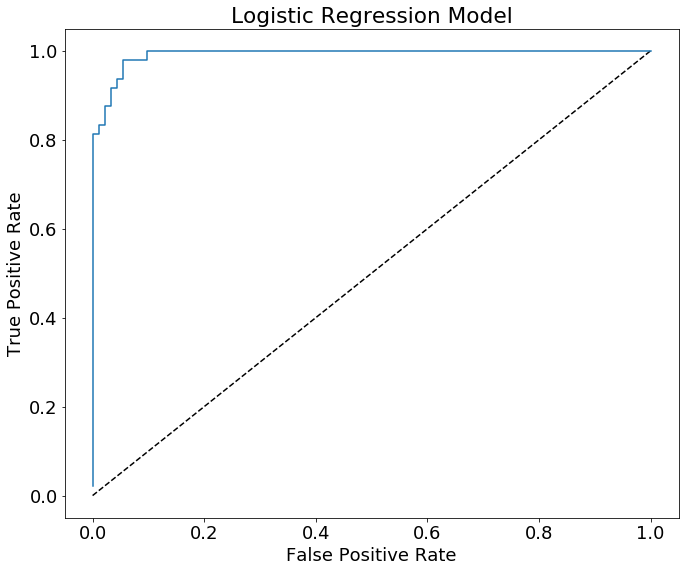

In [289]:
lm = LogisticRegression()

lm.fit(X_train, Y_train)

scoreBreastModel(lm, X_test, Y_test, 'Logistic Regression')

We can immediately see that we're already getting an AUC of almost 1 and a really high accuracy too. This is much improved. It's unlikely that we'll get much better from here, but we do notice that we do a little worse at predicting malignancy than we do benign tumores. It may be worth testing to see what a more powerful model like Random Forest can do. 

             precision    recall  f1-score   support

          0       0.98      0.91      0.94        92
          1       0.85      0.96      0.90        48

avg / total       0.93      0.93      0.93       140

Random Forest accuracy is: 0.9285714285714286
Random Forest AUC is: 0.9639945652173914


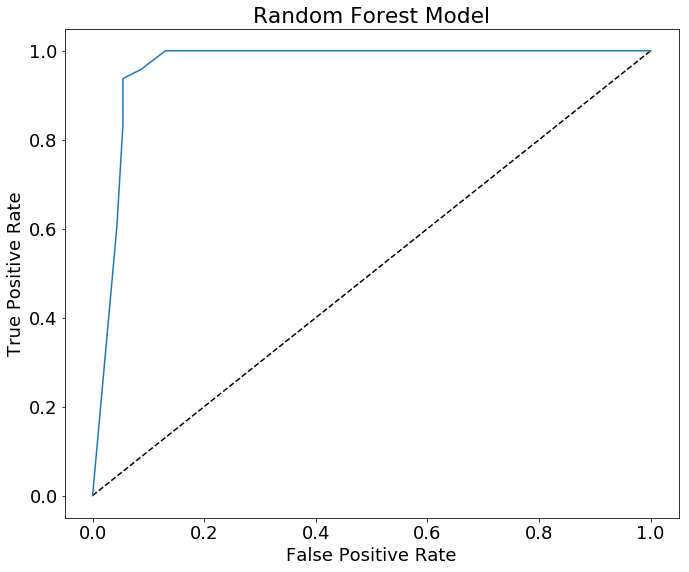

In [290]:
rf = RandomForestClassifier()

rf.fit(X_train, Y_train)

scoreBreastModel(rf, X_test, Y_test, 'Random Forest')

As we suspected, we didn't do any better here; it's probably best to just select the logistic regression model going forward. 

# Part 4: The Chosen Model

As a model, I've selected the Logistic Regression, which achieves an AUC of over 93% on test data. Or, put another way, this is the plot of classifications for both malignant(M) and benign(B).

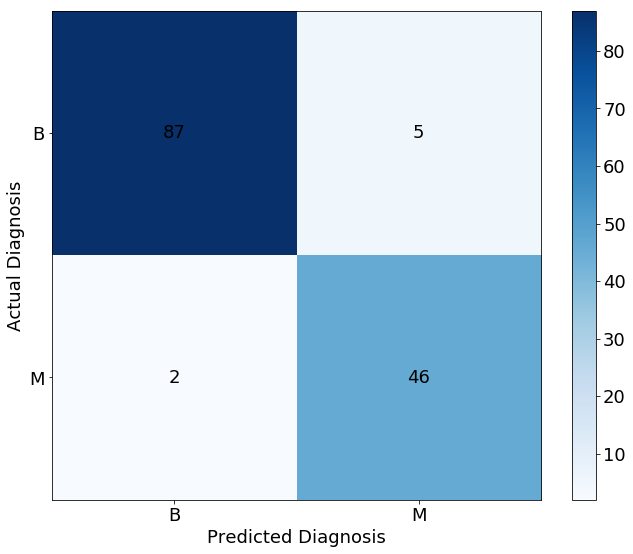

In [291]:
mpl.rcParams.update({'font.size': 18})
Y_pred = lm.predict(X_test)

mtx_rfc_pos = confusion_matrix(Y_test, Y_pred)

fig = plt.figure(figsize=(11, 9))
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = ax.imshow(np.array(mtx_rfc_pos), cmap=plt.cm.Blues, 
                interpolation='nearest')

width, height = mtx_rfc_pos.shape

for x in range(width):
    for y in range(height):
        ax.annotate(str(mtx_rfc_pos[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')
        

cb = fig.colorbar(res)
alphabet = 'BM'
plt.xticks(range(width), alphabet[:width])
plt.yticks(range(height), alphabet[:height])   
plt.ylabel('Actual Diagnosis')
plt.xlabel('Predicted Diagnosis')
plt.show()



The model is a logistic regression model that currently uses all parameters. For future improvements/alterations to the model, I could try:

* Running cross validation to get a better estimate of error
* Reducing the number of features via subset selection or PCA
* Balancing the classes by upsampling the under-represented 'Benign' class


# Conclusions

Based upon this model and its prediction capabilities, there are a few notable takeaways:

* The model achieves > 95% test accuracy, an improvement of > 30% over a naive model (i.e. all Benign)
* It also achieves an AUC of > 99%, nearly a 50% improvement over the naive model
* Based on the high predictive capabilities of the model, a more powerful model is not necessary

Going forward, this model can produce immediate benefits by accurately diagnosing most malignant tumors. As an organization of busy medical professionals, this will allow the company the allocate its resources in other a